In [ ]:
### using matplotlib -> not good

import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# extract clade information
NLR_list = pd.read_csv("original_data/tomato_NLRs_from_AKI.csv")
clade_info = NLR_list.loc[:, ["gene_short_na", "NLR clade"]]

# extract gene_distance info
NLR_gene_info = pd.read_csv("original_data/NLR_gene_info.csv", index_col=0)
position_data = NLR_gene_info.iloc[:, [0,3,4,9]]
position_data.columns = ["chr", "start", "end", "id"]

clade_info.columns = ["id", "clade"]

position_data = pd.merge(position_data, clade_info, on='id', how='left')

def calc_distance(data_from_chr):
    tmp_position_data = data_from_chr.iloc[:, 1]
    tmp_position_data = np.stack([np.array(tmp_position_data), np.zeros(tmp_position_data.shape[0])], 1)

    dist = distance.cdist(tmp_position_data, tmp_position_data, metric='euclidean')
    return dist

# chr_name = "SL3.0ch04"
# position_data = position_data[position_data["chr"] == chr_name]
position_data = position_data.sort_values(["clade"])

print(position_data)

clades = np.array(position_data["clade"])
x, clades_index = np.unique(clades,return_inverse = True)

dist = pd.DataFrame(calc_distance(position_data))
dist.index = position_data["chr"].values
dist.columns = position_data["chr"].values

for i in range(dist.shape[0]):
    diff_chr = dist.columns != dist.index[i]
    dist.iloc[i, :].loc[diff_chr] = 30000

dist = np.array(dist)

dist[dist>30000] = 30000
# dist[dist==0] = 30000
print(dist)
# dist = 50000/dist
fig, ax = plt.subplots(figsize=(80,60))
im = sns.heatmap(dist, cmap="Reds_r")
# im = sns.clustermap(dist, cmap="Reds_r", row_linkage=Z, col_linkage=Z)

# We want to show all ticks...
ax.set_xticks(np.arange(len(position_data["chr"].tolist())))
ax.set_yticks(np.arange(len(position_data["chr"].tolist())))
# ... and label them with the respective list entries
ax.set_xticklabels(position_data["id"].tolist(), va="center")
ax.set_yticklabels(position_data["id"].tolist(), va="center")

ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor", va="center")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor", va="center")

dx = 30/dist.shape[0]; dy = 0 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
dx = 0; dy = -30/dist.shape[0] 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

colorlist = []
for i in range(len(np.unique(clades_index))):
    colorlist.append([np.random.random(), np.random.random(), np.random.random()])

for i, x_tick in enumerate(ax.xaxis.get_ticklabels()):
    color = colorlist[clades_index[i]]
    x_tick.set_color(color)

for i, y_tick in enumerate(ax.yaxis.get_ticklabels()):
    color = colorlist[clades_index[i]]
    y_tick.set_color(color)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.show()

In [71]:
### To excel data

import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# extract clade information
NLR_list = pd.read_csv("original_data/tomato_NLRs_from_AKI.csv")
clade_info = NLR_list.loc[:, ["gene_short_na", "NLR clade"]]

# extract gene_distance info
NLR_gene_info = pd.read_csv("original_data/NLR_gene_info.csv", index_col=0)
position_data = NLR_gene_info.iloc[:, [0,3,4,9]]
position_data.columns = ["chr", "start", "end", "id"]

clade_info.columns = ["id", "clade"]

position_data = pd.merge(position_data, clade_info, on='id', how='left')

def calc_distance(data_from_chr):
    tmp_position_data = data_from_chr.iloc[:, 1]
    tmp_position_data = np.stack([np.array(tmp_position_data), np.zeros(tmp_position_data.shape[0])], 1)

    dist = distance.cdist(tmp_position_data, tmp_position_data, metric='euclidean')
    return dist


# chr_name = "SL3.0ch04"
# position_data = position_data[position_data["chr"] == chr_name]
position_data = position_data.sort_values(["clade"])

dist = pd.DataFrame(calc_distance(position_data))
dist.index = position_data["chr"].values
dist.columns = position_data["chr"].values

for i in range(dist.shape[0]):
    diff_chr = dist.columns != dist.index[i]
    dist.iloc[i, :].loc[diff_chr] = np.nan

dist.index = position_data["id"].values
dist.columns = position_data["id"].values
dist["clade"] = position_data["clade"].values

dist.to_csv("original_data/NLR_distance_matrix.csv")

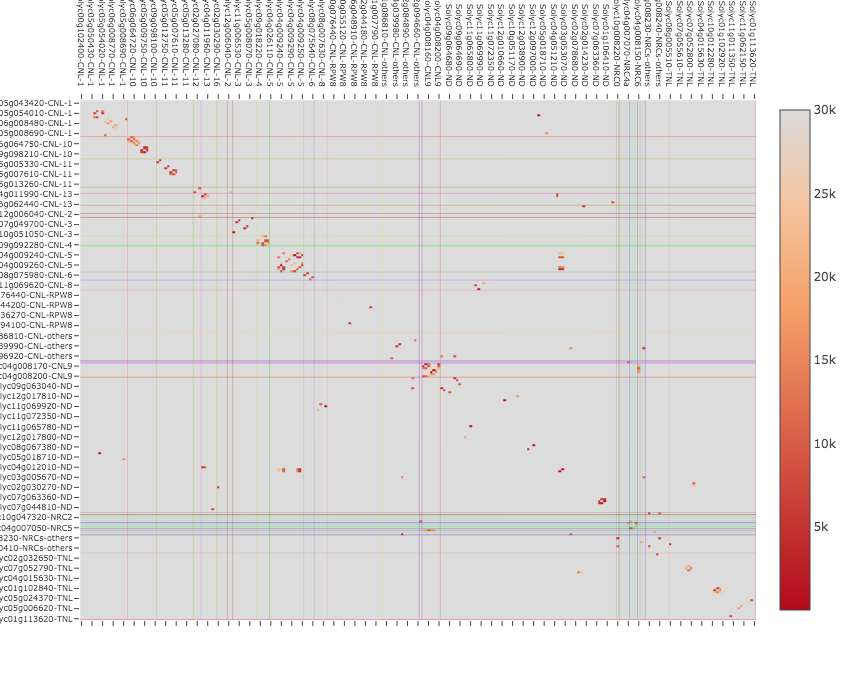

In [254]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import copy
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

threshold = 30000

### extract clade information
NLR_list = pd.read_csv("original_data/tomato_NLRs_from_AKI.csv")
clade_info = NLR_list.loc[:, ["gene_short_na", "NLR clade"]]
clade_info.columns = ["id", "clade"]

### extract gene_distance info
NLR_gene_info = pd.read_csv("original_data/NLR_gene_info.csv", index_col=0)
position_data = NLR_gene_info.iloc[:, [0,3,4,9]]
position_data.columns = ["chr", "start", "end", "id"]

### merge both data
position_data = pd.merge(position_data, clade_info, on='id', how='left')

def calc_distance(data_from_chr):
    tmp_position_data = data_from_chr.iloc[:, 1]
    tmp_position_data = np.stack([np.array(tmp_position_data), np.zeros(tmp_position_data.shape[0])], 1)

    dist = distance.cdist(tmp_position_data, tmp_position_data, metric='euclidean')
    return dist

### calculate distances between genes

# chr_name = "SL3.0ch04"
# position_data = position_data[position_data["chr"] == chr_name]
position_data = position_data.sort_values(["clade"])

dist = pd.DataFrame(calc_distance(position_data))
dist.index = position_data["chr"].values
dist.columns = position_data["chr"].values

position_data['id_clade'] = position_data['id'].str.cat(position_data['clade'], sep='-')

origin_dist = copy.copy(dist)

for i in range(dist.shape[0]):
    diff_chr = dist.columns != dist.index[i]
    dist.iloc[i, :].loc[diff_chr] = threshold
    origin_dist.iloc[i, :].loc[diff_chr] = np.nan

dist = np.array(dist)
origin_dist = np.array(origin_dist)
dist = np.flip(dist, 0)
origin_dist = np.flip(origin_dist, 0)
dist[dist==0] = 30000
dist[dist>threshold] = threshold

### set text of cells
hovertext = list()
for yi, yy in enumerate(position_data["id"].values[::-1]):
    hovertext.append(list())
    for xi, xx in enumerate(position_data["id"].values):
        hovertext[-1].append('1: {} {}<br />2: {} {}<br />Distance: {}'.format(yy, position_data["clade"].values[::-1][yi], xx, position_data["clade"].values[xi], origin_dist[yi][xi]))

### make heatmap
trace = go.Heatmap(
                   z=dist,
                   colorscale="Reds",
                   reversescale=True,
                   x=position_data["id_clade"],
                   y=position_data["id_clade"].values[::-1],
                   hoverinfo='text',
                   text=hovertext
                  )
data=[trace]

### add separate lines of clade
lines = []
start = -0.5

colorlist = []
for i in range(len(position_data["clade"].unique())):
    colorlist.append("rgb"+str(tuple(np.random.random(size=3)*256)))

for i, each_clade in enumerate(position_data["clade"].unique()):
    start += position_data["clade"].value_counts()[each_clade]
    lines.append(dict(
                      type="line", xref="x", yref="y",
                      x0=start, y0=-0.5,
                      x1=start, y1=position_data.shape[0]-0.5,
                      opacity=0.5,
                      line=dict(color=colorlist[i], width=0.5))
                     )
    lines.append(dict(
                      type="line", xref="x", yref="y",
                      x0=-0.5, y0=position_data.shape[0]-1-start,
                      x1=position_data.shape[0]-0.5, y1=position_data.shape[0]-1-start,
                      opacity=0.75,
                      line=dict(color=colorlist[i], width=0.5))
                     )

### setting layout & draw
layout = go.Layout(
                   width=700,
                   height=700,
                   autosize=False,
                   xaxis=dict(mirror="allticks", side="top", tickfont=dict(size=8)),
                   yaxis=dict(tickfont=dict(size=8)),
                   shapes=lines
                  )
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='basic-heatmap')

In [ ]:
# add sensor & helper version

In [251]:
print(position_data[position_data["id"] == "Solyc04g008120"])
print(position_data[position_data["id"] == "Solyc04g008150"])

a1 = position_data[position_data["id"] == "Solyc04g008120"].start.values[0]
a2 = position_data[position_data["id"] == "Solyc04g008120"].end.values[0]

b1 = position_data[position_data["id"] == "Solyc04g008150"].start.values[0]
b2 = position_data[position_data["id"] == "Solyc04g008150"].end.values[0]

(a1+a2)/2 - (b1+b2)/2

          chr    start      end              id clade             id_clade
55  SL3.0ch04  1795220  1800554  Solyc04g008120  CNL9  Solyc04g008120-CNL9
          chr    start      end              id clade             id_clade
58  SL3.0ch04  1829341  1834179  Solyc04g008150  NRC6  Solyc04g008150-NRC6


-33873.0